<a href="https://colab.research.google.com/github/Praveen3110/Formula1-data-analysis/blob/main/F1_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#to ensure all the plot are in line


In [ ]:
#load the and assign columns
results=pd.read_csv("results.csv")
races=pd.read_csv("races.csv")
drivers=pd.read_csv("drivers.csv")
constructor=pd.read_csv("constructors.csv")


In [ ]:
results.head()
#drivers.head(1)
#races.head(2)
#constructor.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
df=pd.merge(results,races[["raceId","year","name","round"]],on="raceId",how="left")
df=pd.merge(df,drivers[["driverId","driverRef","surname","nationality"]],on="driverId",how="left")
df=pd.merge(df,constructor[["constructorId","name","nationality"]],on="constructorId",how="left")
df.head()
df.shape

(26759, 26)

In [ ]:
#drop unwanted column
df.drop(["number","position","surname","positionText","laps","statusId","resultId","raceId","driverId","constructorId"],axis=1,inplace=True)

In [ ]:
df.head(100)

,grid,positionOrder,points,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,1,10.0,1:34:50.616,5690616,39,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,41,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,41,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,58,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,43,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11,8,1.0,+1:11.406,5280857,55,9,1:27.795,218.882,2008,Turkish Grand Prix,5,rosberg,German,Williams,British
96,10,9,0.0,+1:15.270,5284721,41,12,1:27.966,218.457,2008,Turkish Grand Prix,5,coulthard,British,Red Bull,Austrian
97,8,10,0.0,+1:16.344,5285795,52,11,1:27.926,218.556,2008,Turkish Grand Prix,5,trulli,Italian,Toyota,Japanese
98,13,11,0.0,\N,\N,57,13,1:27.998,218.377,2008,Turkish Grand Prix,5,button,British,Honda,Japanese


In [ ]:
#rename columns
df.rename(columns={"rank":"fastest_lap_rank","name_x":"gp_name","nationality_x":"driver_nationality","name_y":"constructor_name","nationality_y":"constructor_nationality","driverRef":"driver","fastestLapTime":"fastest_lap_time","fastestLapSpeed":"fastest_lap_speed"},inplace=True)

In [ ]:
df.head(1)
df.shape

(26759, 16)

In [ ]:
#to know the infomation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   grid                     26759 non-null  int64  
 1   positionOrder            26759 non-null  int64  
 2   points                   26759 non-null  float64
 3   time                     26759 non-null  object 
 4   milliseconds             26759 non-null  object 
 5   fastestLap               26759 non-null  object 
 6   fastest_lap_rank         26759 non-null  object 
 7   fastest_lap_time         26759 non-null  object 
 8   fastest_lap_speed        26759 non-null  object 
 9   year                     26759 non-null  int64  
 10  gp_name                  26759 non-null  object 
 11  round                    26759 non-null  int64  
 12  driver                   26759 non-null  object 
 13  driver_nationality       26759 non-null  object 
 14  constructor_name      

In [ ]:
#check if there is any null value
df.isnull().sum()

,0
grid,0
positionOrder,0
points,0
time,0
milliseconds,0
fastestLap,0
fastest_lap_rank,0
fastest_lap_time,0
fastest_lap_speed,0
year,0


In [ ]:
#rearrange the columns
df=df[["year","gp_name","round","driver","constructor_name","grid","positionOrder","points","time","milliseconds","fastest_lap_rank","fastest_lap_time","fastest_lap_speed","driver_nationality","constructor_nationality"]]

In [ ]:
#drop season 2019 as it is incomplete
df=df[df["year"]!=2019]

In [ ]:
#sort values
df=df.sort_values(by=["year","round","positionOrder"],ascending=[False,True,True])

In [ ]:
#replace \n values in the time col
df.time.replace("\\N",np.nan,inplace=True)
df.milliseconds.replace("\\N",np.nan,inplace=True)
df.fastest_lap_rank.replace("\\N",np.nan,inplace=True)
df.fastest_lap_time.replace("\\N",np.nan,inplace=True)
df.fastest_lap_speed.replace("\\N",np.nan,inplace=True)

/tmp/ipython-input-14-3237925383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.time.replace("\\N",np.nan,inplace=True)
/tmp/ipython-input-14-3237925383.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
#change the datatype
try:
    df.fastest_lap_speed=df.fastest_lap_speed.astype(float)
    df.fastest_lap_rank=df.fastest_lap_rank.astype(float)
    df.milliseconds=df.milliseconds.astype(float)
except NameError as e:
    print(e)

In [ ]:
#reset the index
df.reset_index(drop=True,inplace=True)

In [ ]:
#shape
print(df.shape)

(26339, 15)


In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26339 entries, 0 to 26338
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     26339 non-null  int64  
 1   gp_name                  26339 non-null  object 
 2   round                    26339 non-null  int64  
 3   driver                   26339 non-null  object 
 4   constructor_name         26339 non-null  object 
 5   grid                     26339 non-null  int64  
 6   positionOrder            26339 non-null  int64  
 7   points                   26339 non-null  float64
 8   time                     7484 non-null   object 
 9   milliseconds             7484 non-null   float64
 10  fastest_lap_rank         8090 non-null   float64
 11  fastest_lap_time         7836 non-null   object 
 12  fastest_lap_speed        7836 non-null   float64
 13  driver_nationality       26339 non-null  object 
 14  constructor_nationalit

In [ ]:
#head
df.head(1000)

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,2024,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,26.0,1:31:44.742,5504742.0,1.0,1:32.608,210.383,Dutch,Austrian
1,2024,Bahrain Grand Prix,1,perez,Red Bull,5,2,18.0,+22.457,5527199.0,4.0,1:34.364,206.468,Mexican,Austrian
2,2024,Bahrain Grand Prix,1,sainz,Ferrari,4,3,15.0,+25.110,5529852.0,6.0,1:34.507,206.156,Spanish,Italian
3,2024,Bahrain Grand Prix,1,leclerc,Ferrari,2,4,12.0,+39.669,5544411.0,2.0,1:34.090,207.069,Monegasque,Italian
4,2024,Bahrain Grand Prix,1,russell,Mercedes,3,5,10.0,+46.788,5551530.0,12.0,1:35.065,204.946,British,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022,Emilia Romagna Grand Prix,4,mick_schumacher,Haas F1 Team,10,17,0.0,NaN,NaN,4.0,1:18.999,223.704,German,American
996,2022,Emilia Romagna Grand Prix,4,ricciardo,McLaren,6,18,0.0,NaN,NaN,14.0,1:21.577,216.634,Australian,British
997,2022,Emilia Romagna Grand Prix,4,alonso,Alpine F1 Team,9,19,0.0,NaN,NaN,19.0,1:39.685,177.282,Spanish,French
998,2022,Emilia Romagna Grand Prix,4,sainz,Ferrari,4,20,0.0,NaN,NaN,0.0,NaN,NaN,Spanish,Italian


In [ ]:
#will set the figsize and color palette
sns.set_palette("Set3")
plt.rcParams["figure.figsize"]=10,6

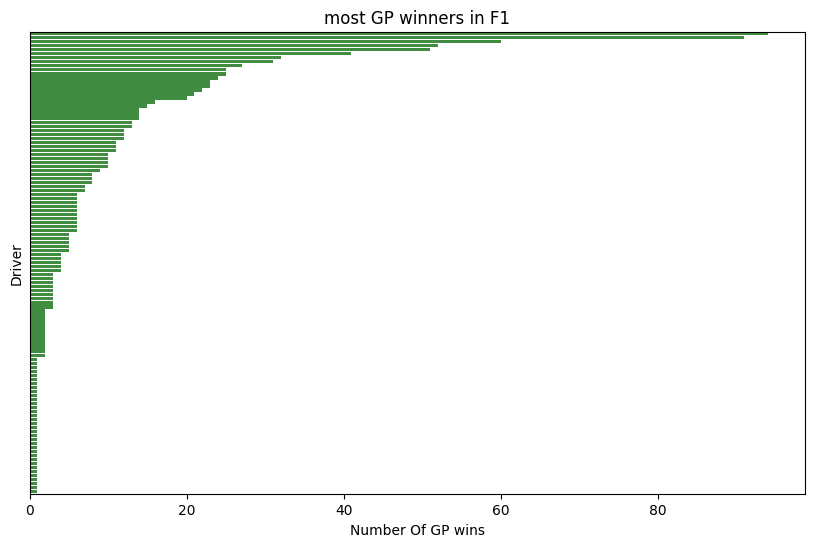

               driver  positionOrder
0            hamilton             94
1  michael_schumacher             91
2      max_verstappen             60
3              vettel             52
4               prost             51


In [ ]:
#gp winners
driver_winner=df.loc[df["positionOrder"]==1].groupby("driver")["positionOrder"].count().sort_values(ascending=False).to_frame().reset_index()

#bar plot
sns.barplot(data=driver_winner,y="driver",x="positionOrder",color="green",alpha=0.8)
plt.title("most GP winners in F1")
plt.xlabel("Number Of GP wins")
plt.ylabel("Driver")
plt.yticks([]) #remover names from y axis
plt.show()

print(driver_winner.head())

In [ ]:
#create a dataframe for the top 10 race winner
top10drivers=driver_winner.head(10)
print(top10drivers)

               driver  positionOrder
0            hamilton             94
1  michael_schumacher             91
2      max_verstappen             60
3              vettel             52
4               prost             51
5               senna             41
6              alonso             32
7             mansell             31
8             stewart             27
9               lauda             25


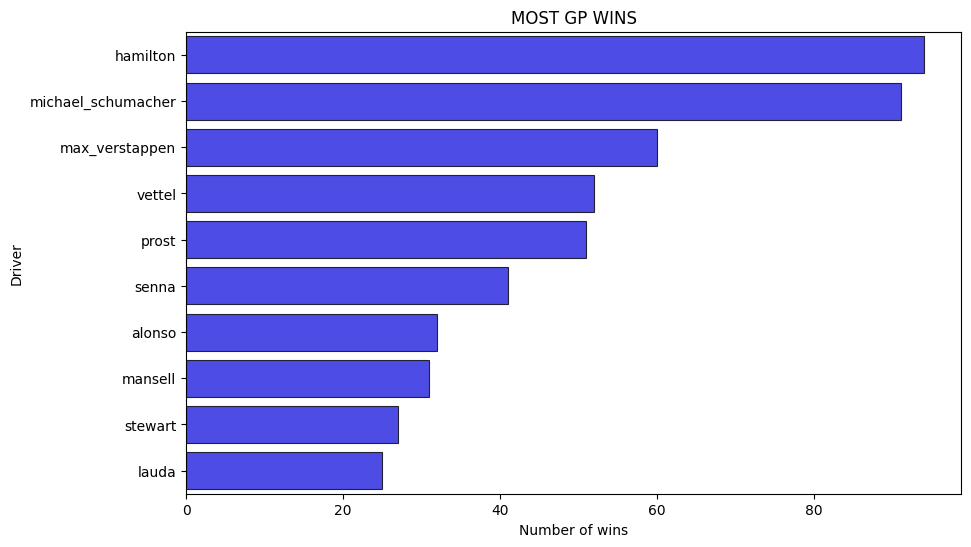

In [ ]:
#top 10 driver plot
sns.barplot(data=top10drivers,y="driver",x="positionOrder",color="blue",alpha=0.8,linewidth=0.8,edgecolor="black")
plt.title("MOST GP WINS")
plt.xlabel("Number of wins")
plt.ylabel("Driver")
plt.show()

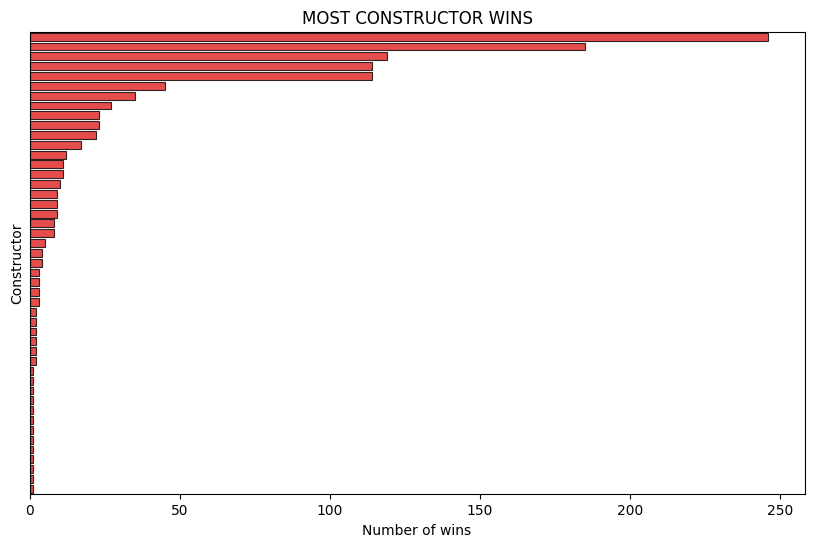

In [ ]:
#constructors winners
constructor_winners=df.loc[df["positionOrder"]==1].groupby("constructor_name")["positionOrder"].count().sort_values(ascending=False).to_frame().reset_index()
sns.barplot(data=constructor_winners,y="constructor_name",x="positionOrder",color="red",alpha=0.8,linewidth=0.8,edgecolor="black")
plt.title("MOST CONSTRUCTOR WINS")
plt.xlabel("Number of wins")
plt.ylabel("Constructor")
plt.yticks([])
plt.show()

In [ ]:
#top 10 constructor winners
top10constructors=constructor_winners.head(10)
print(top10constructors)

  constructor_name  positionOrder
0          Ferrari            246
1          McLaren            185
2         Red Bull            119
3         Mercedes            114
4         Williams            114
5       Team Lotus             45
6          Renault             35
7         Benetton             27
8          Tyrrell             23
9          Brabham             23


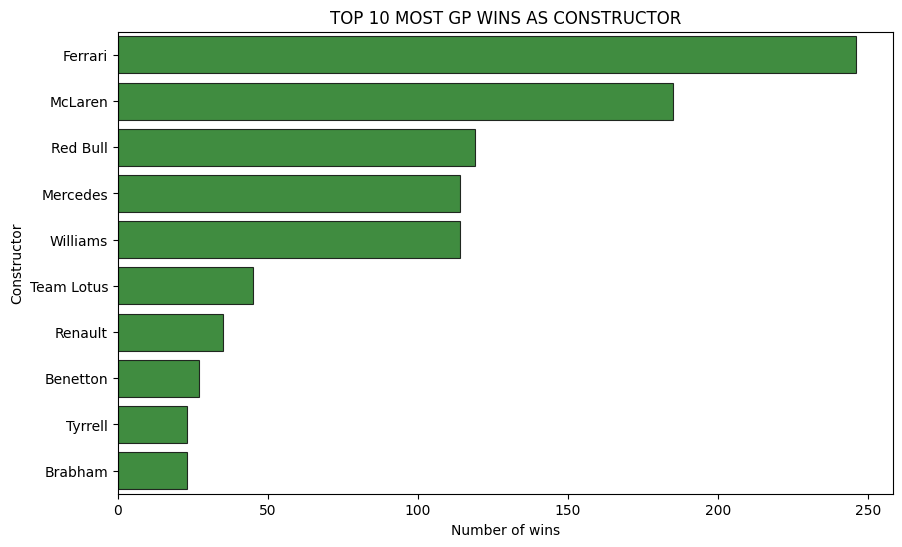

In [ ]:
#barplot for the constructor winners
sns.barplot(data=top10constructors,y="constructor_name",x="positionOrder",color="green",linewidth=0.8,alpha=0.8,edgecolor="black")
plt.title("TOP 10 MOST GP WINS AS CONSTRUCTOR")
plt.xlabel("Number of wins")
plt.ylabel("Constructor")
plt.show()

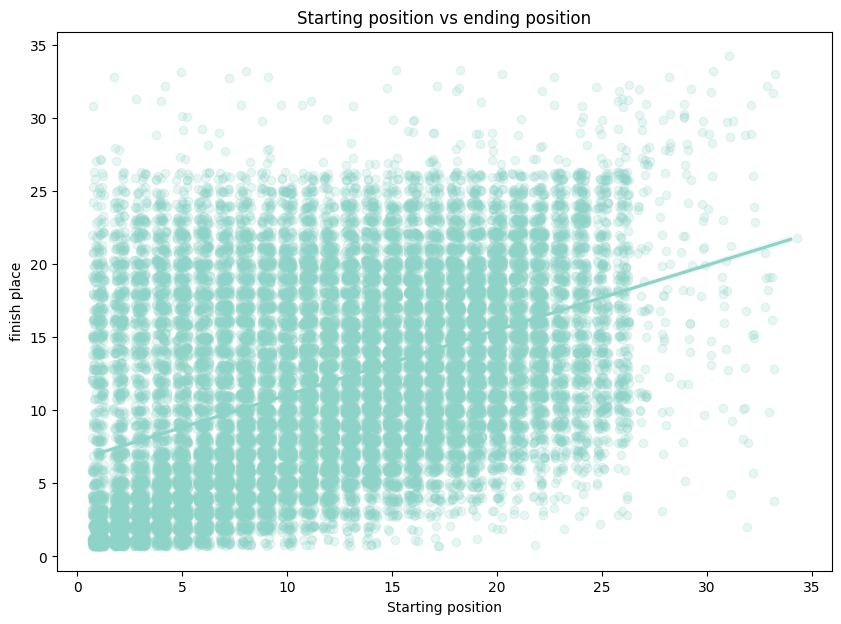

In [ ]:
#regression plot for the starting and ending position
df_no_zero=df[df["grid"]!=0]#excluding it as 0 means the driver start from pit lane

#create a plot
plt.figure(figsize=[10,7])
sns.regplot(data=df_no_zero,x="grid",y="positionOrder",x_jitter=0.3,y_jitter=0.3,scatter_kws={"alpha":1/5});
plt.title("Starting position vs ending position")
plt.xlabel("Starting position")
plt.ylabel("finish place")
plt.show()
#there is a linear relation ship between starting and finish position

Text(0.5, 0.98, 'average speed amongst all teams during the fastest lap at individualGPs')

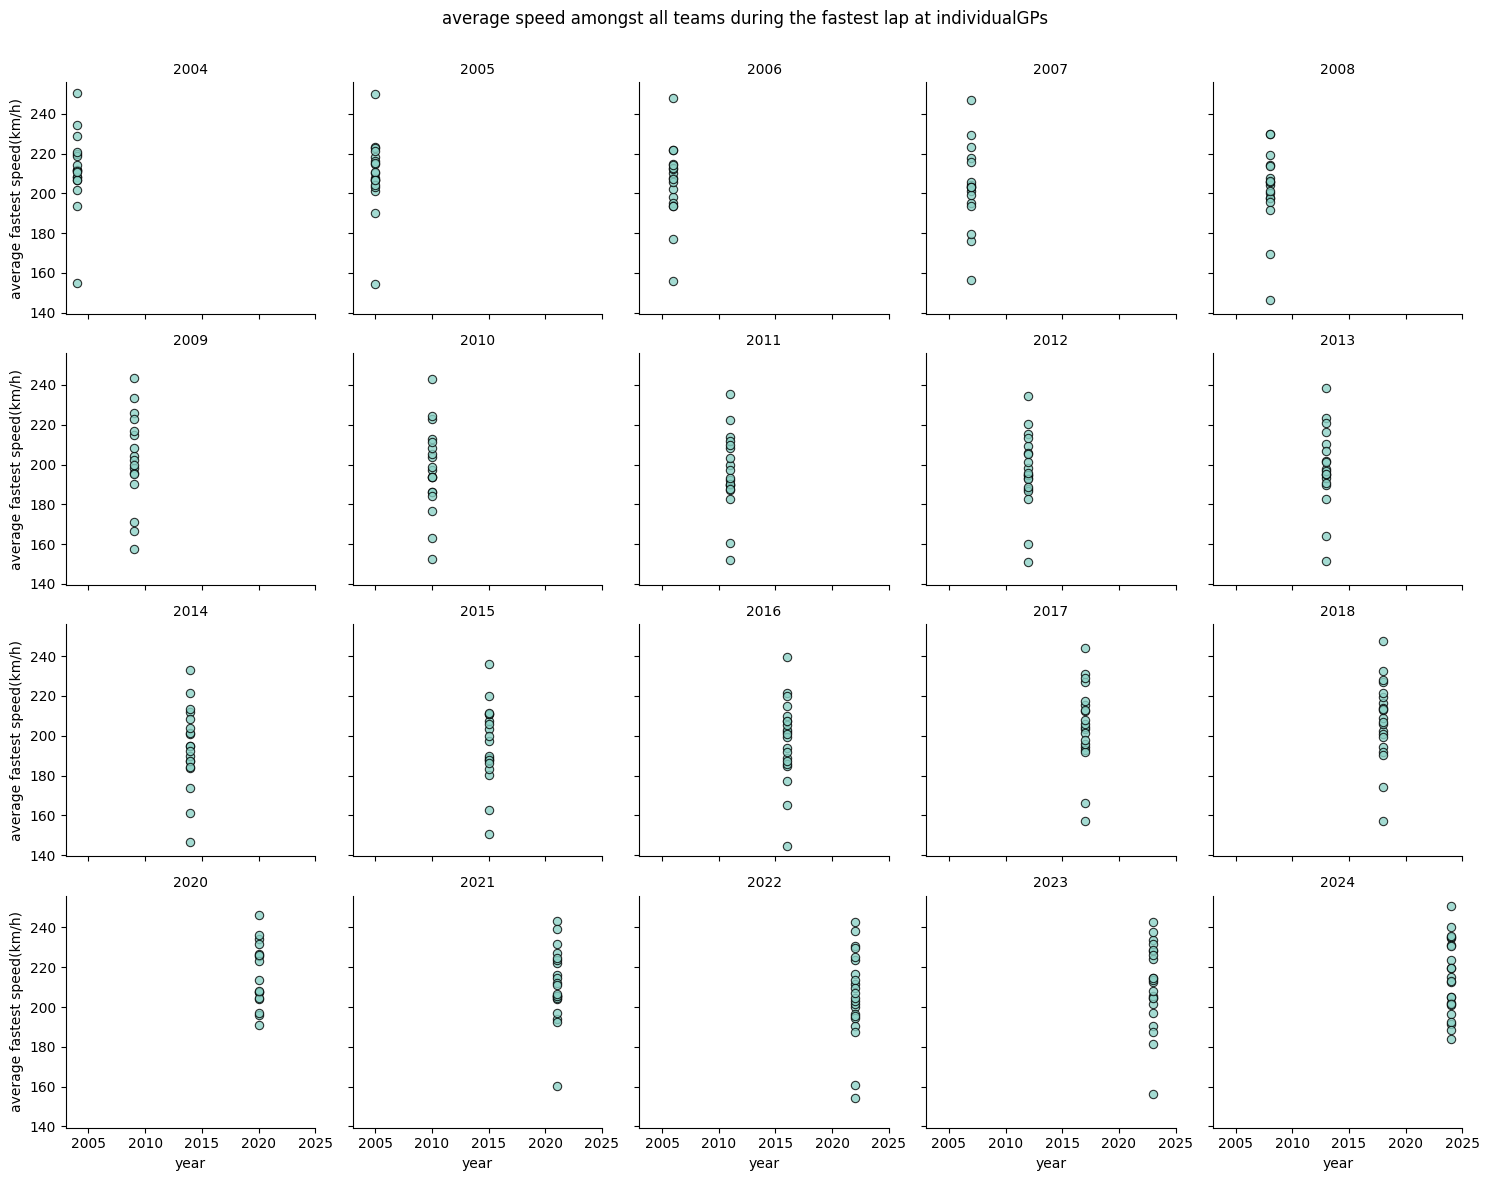

In [ ]:
#create new dataframe for season 2004 onwards
#will see the change of speed of the cars over the years

df_Speed=df[df["year"]>=2004]
df_group_speed=df_Speed.groupby(["gp_name","year"])["fastest_lap_speed"].mean().to_frame().reset_index()

#create a facetgrid
g=sns.FacetGrid(data=df_group_speed,col="year",col_wrap=5)
g.map(plt.scatter,"year","fastest_lap_speed",alpha=0.8,linewidth=0.8,edgecolor="black")
g.set_titles(col_template="{col_name}")
g.set_xlabels("year")
g.set_ylabels("average fastest speed(km/h)")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("average speed amongst all teams during the fastest lap at individualGPs")